# Title : Batch vs Stochastic Gradient Descent

In this post, we will compare the performance of Batch vs Stochastic Gradient Descent on a simple linear regression with simulated data.

In short, Batch Gradient Descent will take all your data to do the optimization. It’s slower,but you can get the optimal theta parameters. With Stochastic, the descent is computed on a sample of your data at every step. It’s faster, scalable and provide accurate result. However, it’s not possible to find the optimal theta parameters.

For those who are interested in the math, I have found two ressources really interesting that I would like to share. If you understand the Batch gradient descent, the Stochastic gradient descent will be easy to learn.

Math tutorial for Batch gradient descent 
- http://math.stackexchange.com/questions/70728/partial-derivative-in-gradient-descent-for-two-variables

Math tutorial for Stochastic gradient descent 
- https://www.youtube.com/watch?v=UfNU3Vhv5CA

In [1]:
### ------ Gather lots data and do a Linear 
###        regression for benchmark result

set.seed(1000)
x <- runif(3000000, -5, 5)
y <- x + rnorm(3000000) + 3
system.time(lm( y ~ x ))

### ------ Define cost function and partial deriviative

# cost function for simple regression
cost_simple_regression <-  function(x,y,beta_1,beta_0) {
 (1/ 2 * n_obs) * sum((y - (beta_1 * x + beta_0))^2)
}

# partial deriviative for the intercept
grad_0 <-  function(x,y,beta_1,beta_0) {
  (1/n_obs) * sum((beta_1 * x + beta_0) - y)
}

# partial deriviative for beta_x (here beta_1. This function
# would work for any coefficients except the intercept)
grad_xi <-  function(x,y,beta_1,beta_0) {
  (1/n_obs) * sum(((beta_1 * x + beta_0) - y) * x)
}

### -------------- Initialize all objects
beta_1 <- 0
beta_0 <- 0
n_iteration <- 50
learning_rate <- 0.1
n_obs <- length(x)
grad_output_batch_0 <- rep(x = 1,n_iteration)
grad_output_batch_1 <- rep(x = 1,n_iteration)
grad_output_stochastic_0 <- rep(x = 1,n_iteration)
grad_output_stochastic_1 <- rep(x = 1,n_iteration)
beta_0_batch <- double(n_iteration)
beta_1_batch <- double(n_iteration)
beta_0_stochastic <- double(n_iteration)
beta_1_stochastic <- double(n_iteration)
cost_store_batch <- double(n_iteration)
cost_store_stochastic <- double(n_iteration)
batch_time <- double(n_iteration)
stochastic_time <- double(n_iteration)


### --------------- Batch gradient descent

for (iteration in 1:n_iteration) {
  ptm <- proc.time()
  cost_store_batch[iteration]<- cost_simple_regression(x,y,beta_1,beta_0)
  
  grad_output_batch_0[iteration] <- grad_0(x,y,beta_1,beta_0)
  beta_0 <- beta_0 - (learning_rate * grad_output_batch_0[iteration])
  beta_0_batch[iteration] <- beta_0
  
  grad_output_batch_1[iteration] <- grad_xi(x,y,beta_1,beta_0)
  beta_1 <- beta_1 - (learning_rate * grad_output_batch_1[iteration])
  beta_1_batch[iteration] <- beta_1
  
  batch_time[iteration] <- (proc.time() - ptm)[3]
}

### ----------------- Stochastic gradient descent

## shuffle the data
df <- data.frame(x,y)
df2 <- df[sample(nrow(df)),]

## Start the descent
## We consider 10 % of the data as sampling

for (iteration in 1:n_iteration) {
  ptm <- proc.time()
  
  train <- df[sample(x = nrow(df),size = nrow(df)/10),]
  x <- train$x
  y <- train$y
  
  cost_store_stochastic[iteration]<- cost_simple_regression(x,y,beta_1,beta_0)
  
  grad_output_stochastic_0[iteration] <- grad_0(x,y,beta_1,beta_0)
  beta_0 <- beta_0 - (learning_rate * grad_output_stochastic_0[iteration])
  beta_0_stochastic[iteration] <- beta_0
  
  grad_output_stochastic_1[iteration] <- grad_xi(x,y,beta_1,beta_0)
  beta_1 <- beta_1 - (learning_rate * grad_output_stochastic_1[iteration])
  beta_1_stochastic[iteration] <- beta_1
  
  stochastic_time[iteration] <- (proc.time() - ptm)[3]
}


   user  system elapsed 
  4.261   0.221   4.485 

ERROR: Error in file(con, "rb"): cannot open the connection


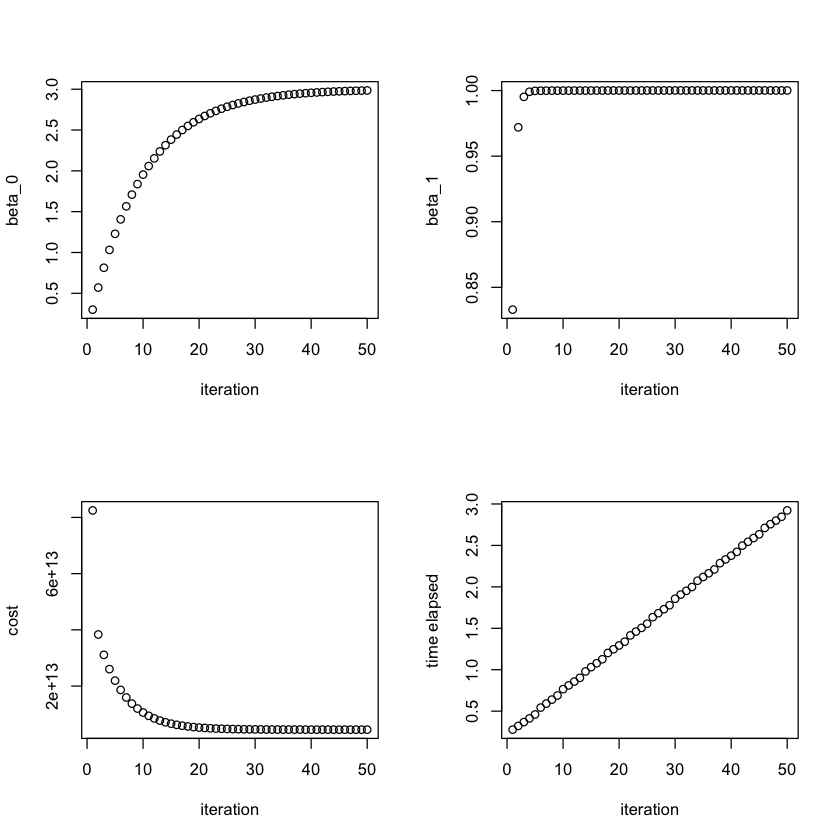

In [7]:
# let's compare the result
# Batch Gradient Descent
par(mfrow=c(2,2))
plot(beta_0_batch,xlab="iteration",ylab="beta_0")
plot(beta_1_batch,xlab="iteration",ylab="beta_1")
plot(cost_store_batch,xlab="iteration",ylab="cost")
plot(cumsum(batch_time),xlab="iteration",ylab="time elapsed")

ERROR: Error in file(con, "rb"): cannot open the connection


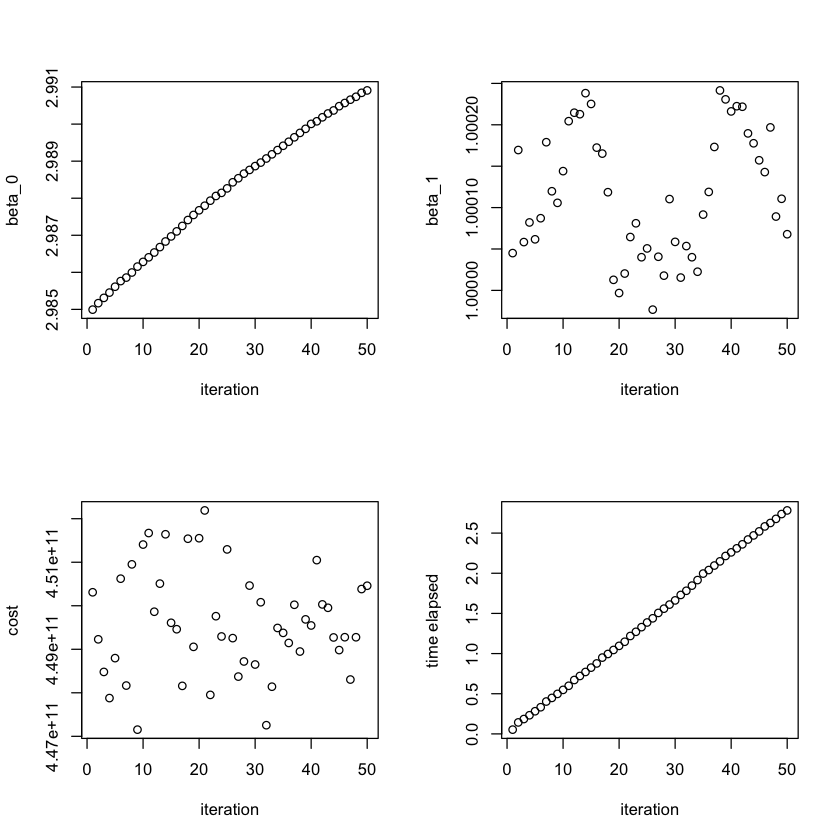

In [8]:
# Stochastic Gradient Descent
par(mfrow=c(2,2))

plot(beta_0_stochastic,xlab="iteration",ylab="beta_0")
plot(beta_1_stochastic,xlab="iteration",ylab="beta_1")
plot(cost_store_stochastic,xlab="iteration",ylab="cost")
plot(cumsum(stochastic_time),xlab="iteration",ylab="time elapsed")

  | Command       | time          |  intercept  |  beta_1  |
  | :------------:|:-------------:| :----------:| :-------:|
  | lm            |    1.988      | 3.001       | 1.005    |
  | Batch (i = 1) |    0.052      | 0.299       | 0.832    |
  | Batch (i = 10)|    0.610      | 1.954       | 0.999    |
  | Batch (i = 30)|    1.879      | 2.873       | 1.001    |
  | Stoch (i = 1) |    0.057      | 2.985       | 1.0002   |
  | Stoch (i = 10)|    0.587      | 2.986       | 1.0001   |
  | Stoch (i = 30)|    1.711      | 2.988       | 1.000    |


In summary we can see that the Stochastic Gradient descent provide accurate result with only 1 iteration. In contrast, the Batch Gradient Descent has weak result at the first iteration. We can also see that the Stochastic descent is not able to find optimal parameter (image top-right)